<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [ ]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [ ]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [ ]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


## Demo: Listing All Tables


To view the names of all tables in the database:


In [ ]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


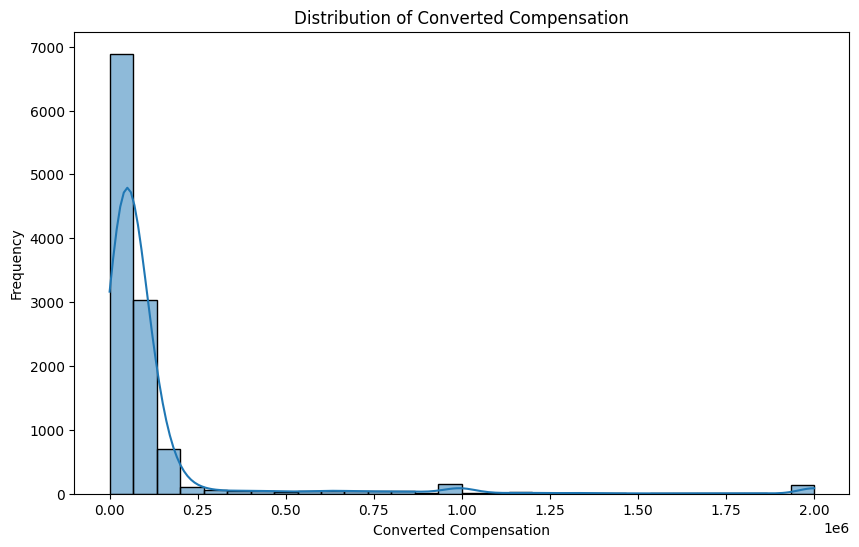

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_survey_data_lab2.csv")

# Sıfır değerleri filtrele
df_nonzero = df[df['ConvertedComp'] > 0]

# Histogram çizimi
plt.figure(figsize=(10,6))
sns.histplot(df_nonzero['ConvertedComp'], bins=30, kde=True)
plt.title("Distribution of Converted Compensation")
plt.xlabel("Converted Compensation")
plt.ylabel("Frequency")
plt.show()


**Box Plots**

Plot a box plot of Age.


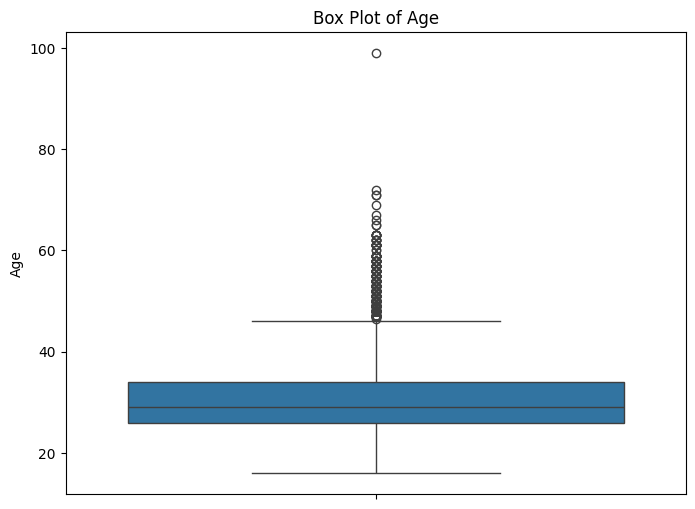

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri
df = pd.read_csv("cleaned_survey_data_lab2.csv")

# Box plot çizimi
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Age'])
plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


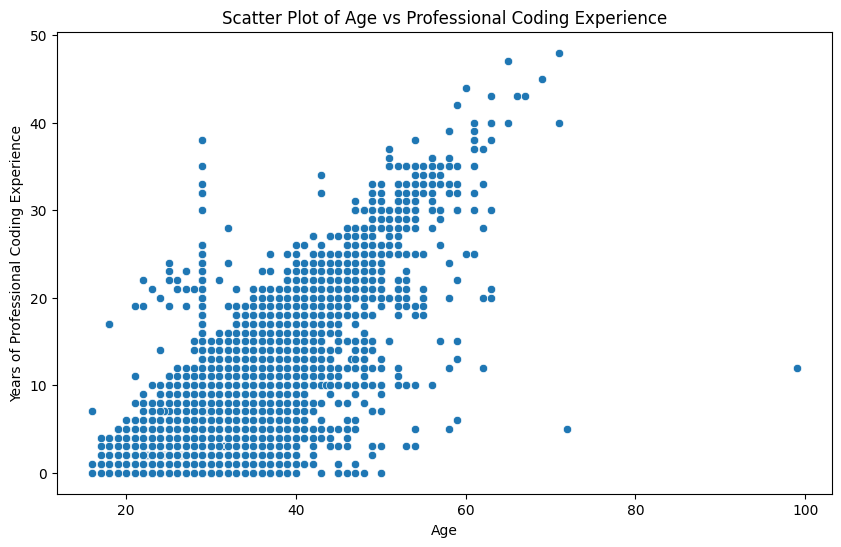

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri
df = pd.read_csv("cleaned_survey_data_lab2.csv")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='YearsCodeProNum', data=df)
plt.title("Scatter Plot of Age vs Professional Coding Experience")
plt.xlabel("Age")
plt.ylabel("Years of Professional Coding Experience")
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


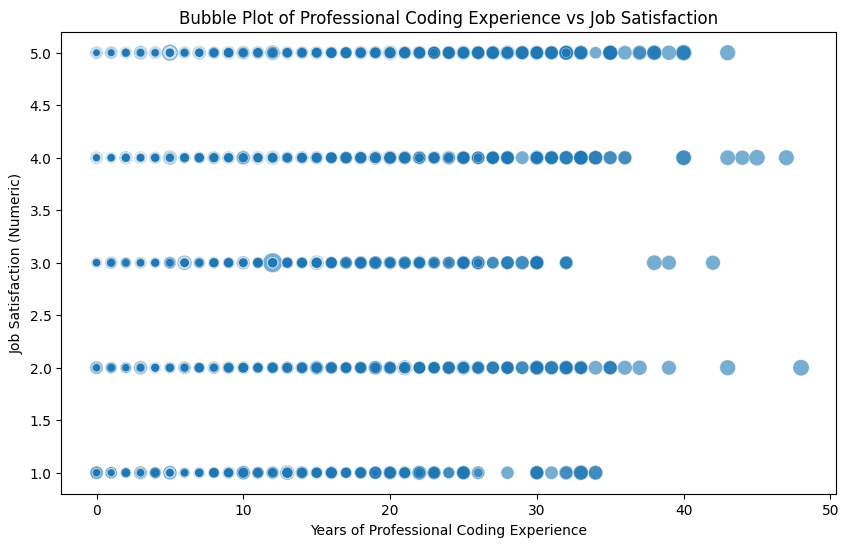

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri
df = pd.read_csv("cleaned_survey_data_lab2.csv")

# Bubble plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='YearsCodeProNum',
    y='JobSatNum',
    size='Age',       # Bubble boyutu
    sizes=(20, 200),  # Min ve max boyut
    data=df,
    alpha=0.6,
    legend=False
)
plt.title("Bubble Plot of Professional Coding Experience vs Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (Numeric)")
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases (DatabaseDesireNextYear) that respondents wish to learn next year.


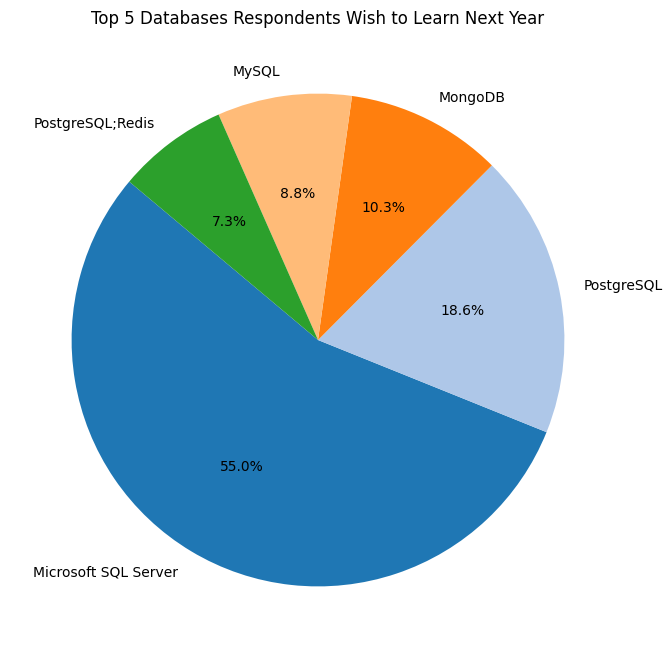

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri
df = pd.read_csv("cleaned_survey_data_lab2.csv")

# Top 5 database
top5_db = df['DatabaseDesireNextYear'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(top5_db, labels=top5_db.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Top 5 Databases Respondents Wish to Learn Next Year")
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median YearsCodeProNum and JobSatNum for respondents aged 30 to 35.


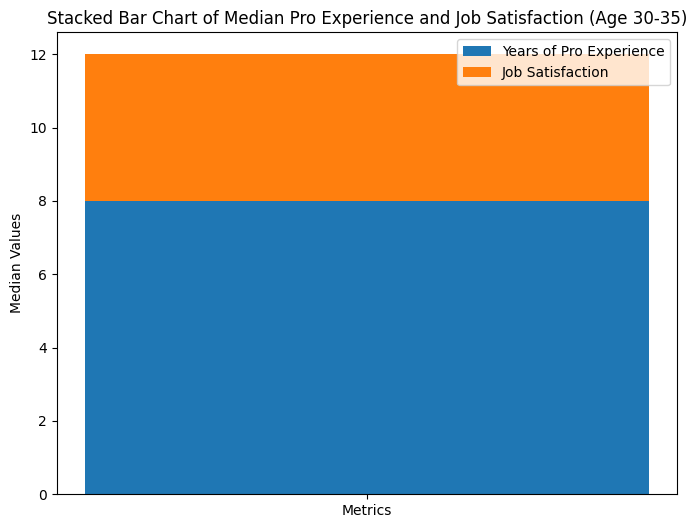

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri
df = pd.read_csv("cleaned_survey_data_lab2.csv")

# 30-35 yaş grubunu filtrele
age_group = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Medyan değerleri hesapla
median_values = age_group[['YearsCodeProNum', 'JobSatNum']].median()

# Stacked bar chart çizimi
plt.figure(figsize=(8,6))
plt.bar('Metrics', median_values['YearsCodeProNum'], label='Years of Pro Experience')
plt.bar('Metrics', median_values['JobSatNum'], bottom=median_values['YearsCodeProNum'], label='Job Satisfaction')
plt.title("Stacked Bar Chart of Median Pro Experience and Job Satisfaction (Age 30-35)")
plt.ylabel("Median Values")
plt.legend()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot a line chart of the median CompTotal for respondents aged 45 to 60.


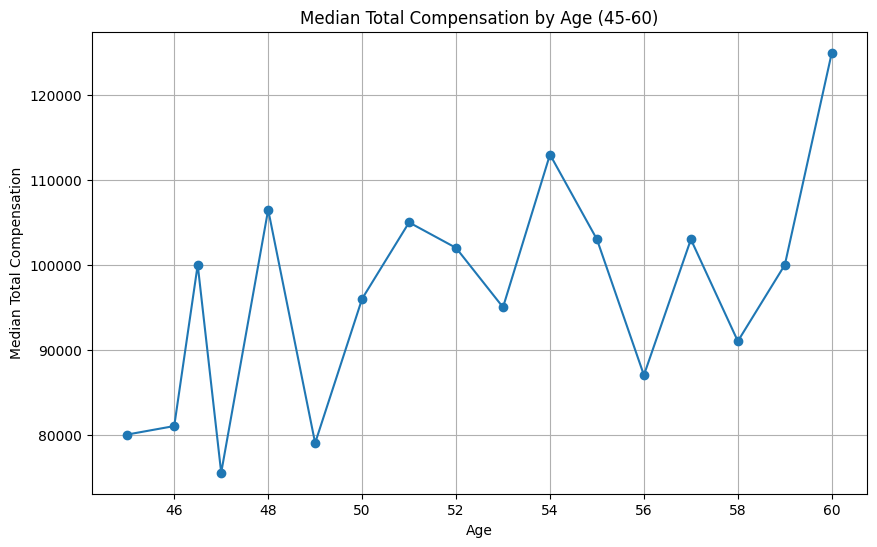

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri
df = pd.read_csv("cleaned_survey_data_lab2.csv")

# Sıfır olmayan CompTotal değerlerini seç
df_nonzero = df[df['CompTotal'] > 0]

# 45-60 yaş grubunu filtrele
age_group = df_nonzero[(df_nonzero['Age'] >= 45) & (df_nonzero['Age'] <= 60)]

# Yaşlara göre medyan CompTotal hesapla
median_comp = age_group.groupby('Age')['CompTotal'].median()

# Line chart çizimi
plt.figure(figsize=(10,6))
plt.plot(median_comp.index, median_comp.values, marker='o')
plt.title("Median Total Compensation by Age (45-60)")
plt.xlabel("Age")
plt.ylabel("Median Total Compensation")
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart showing the count of respondents in each MainBranch


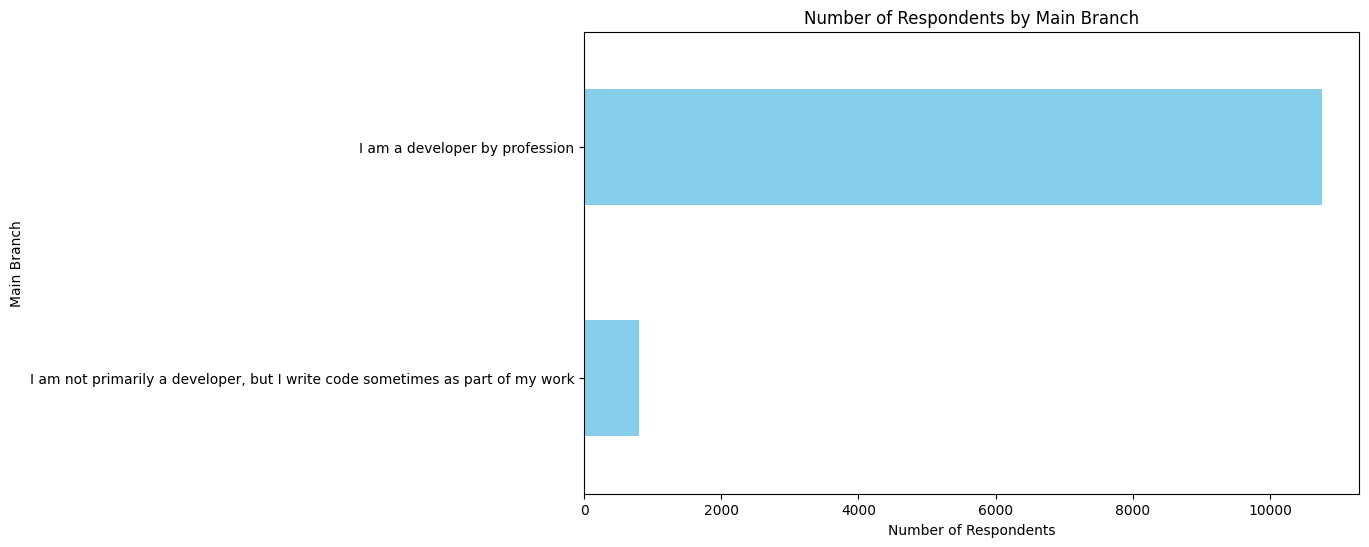

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri
df = pd.read_csv("cleaned_survey_data_lab2.csv")

# MainBranch sayımlarını al
branch_counts = df['MainBranch'].value_counts()

# Horizontal bar chart çizimi
plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='skyblue')
plt.title("Number of Respondents by Main Branch")
plt.xlabel("Number of Respondents")
plt.ylabel("Main Branch")
plt.gca().invert_yaxis()  # En yüksek değeri üstte göster
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
